<a href="https://colab.research.google.com/github/ZeerakJawed/HeartDiseasePrediction/blob/main/DLPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Given clinical parameters about a patient, can we predict whether our not they have heart disease. Given that the target is binary it means it is a binary classification problem

Popular algorithms that can be used for binary classification include:

Logistic Regression
k-Nearest Neighbors
Decision Trees
Support Vector Machine
Naive Bayes





### importing dataset and EDA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("./Clean_heart_data.csv")
#importing the file from drive into a dataframe

In [ ]:
# !pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
from pandas_profiling import ProfileReport
%matplotlib inline
pd.set_option('display.max_colwidth', None)

In [ ]:
# Pandas profiling report
profile = ProfileReport(df, title='heart' , html={'style':{'full_width':True}})

In [ ]:
profile.to_notebook_iframe()

Render HTML: 100%|██████████| 1/1 [00:02<00:00,  2.62s/it]


In [ ]:
df.info()
# 1018 entries and all entries present hence no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018 entries, 0 to 1017
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1018 non-null   int64  
 1   age                  1018 non-null   int64  
 2   sex                  1018 non-null   int64  
 3   chest_pain_type      1018 non-null   int64  
 4   resting_bp_s         1018 non-null   int64  
 5   cholesterol          1018 non-null   int64  
 6   fasting_blood_sugar  1018 non-null   int64  
 7   resting_ecg          1018 non-null   int64  
 8   max_heart_rate       1018 non-null   int64  
 9   exercise_angina      1018 non-null   int64  
 10  oldpeak              1018 non-null   float64
 11  ST_slope             1018 non-null   int64  
 12  target               1018 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 103.5 KB


In [ ]:
df.describe()
#range of each variable is different, objective functions might not work propeerly for som ML algorithms.
#Normalization is needed.

Unnamed: 0          age          sex  chest_pain_type  resting_bp_s  \
count  1018.000000  1018.000000  1018.000000      1018.000000   1018.000000   
mean    630.762279    53.294695     0.734774         3.165029    132.571709   
std     358.993376     9.415441     0.441670         0.953323     17.451133   
min       1.000000    28.000000     0.000000         1.000000     92.000000   
25%     255.250000    46.000000     0.000000         2.000000    120.000000   
50%     681.500000    54.000000     1.000000         3.000000    130.000000   
75%     935.750000    60.000000     1.000000         4.000000    140.000000   
max    1190.000000    77.000000     1.000000         4.000000    200.000000   

       cholesterol  fasting_blood_sugar  resting_ecg  max_heart_rate  \
count  1018.000000          1018.000000  1018.000000     1018.000000   
mean    245.906680             0.162083     0.740668      142.730845   
std      57.244599             0.368708     0.898779       24.511837   
min      85.000000             0.000000     0.000000       69.000000   
25%     209.000000             0.000000     0.000000      125.000000   
50%     240.000000             0.000000     0.000000      144.000000   
75%     276.000000             0.000000     2.000000      161.000000   
max     603.000000             1.000000     2.000000      202.000000   

       exercise_angina      oldpeak     ST_slope       target  
count      1018.000000  1018.000000  1018.000000  1018.000000  
mean          0.370334     0.939194     1.586444     0.468566  
std           0.483131     1.093669     0.603898     0.499256  
min           0.000000    -0.100000     0.000000     0.000000  
25%           0.000000     0.000000     1.000000     0.000000  
50%           0.000000     0.600000     2.000000     0.000000  
75%           1.000000     1.600000     2.000000     1.000000  
max           1.000000     6.200000     3.000000     1.000000

UNDERSTANDING THE DATA WITH CORRELATION MATRIX.

- Corr matrix convinienelty summarises the correllation between all variables in a dataset.

- Detect any multicollinearity which can affect interprating the results of regression methods.

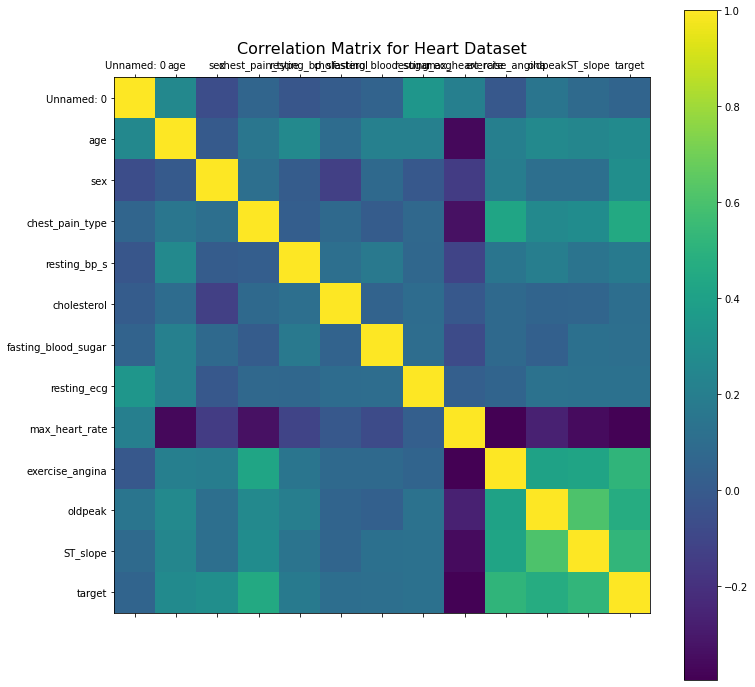

In [ ]:
rcParams['figure.figsize']= 12,12
plt.matshow(df.corr())
plt.xticks(np.arange(df.shape[1]),df.columns)
plt.yticks(np.arange(df.shape[1]),df.columns)
plt.colorbar()
plt.title('Correlation Matrix for Heart Dataset', fontsize=16);
#no one feature is highly correlated with the target value


Histogram to see distribution of features and labels.

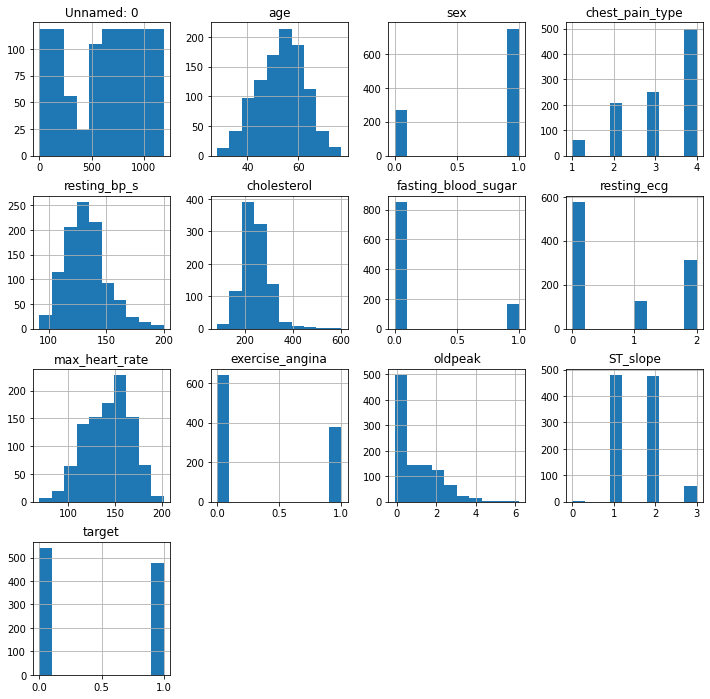

In [ ]:
df.hist() # different ranges, need scaling.
plt.show()

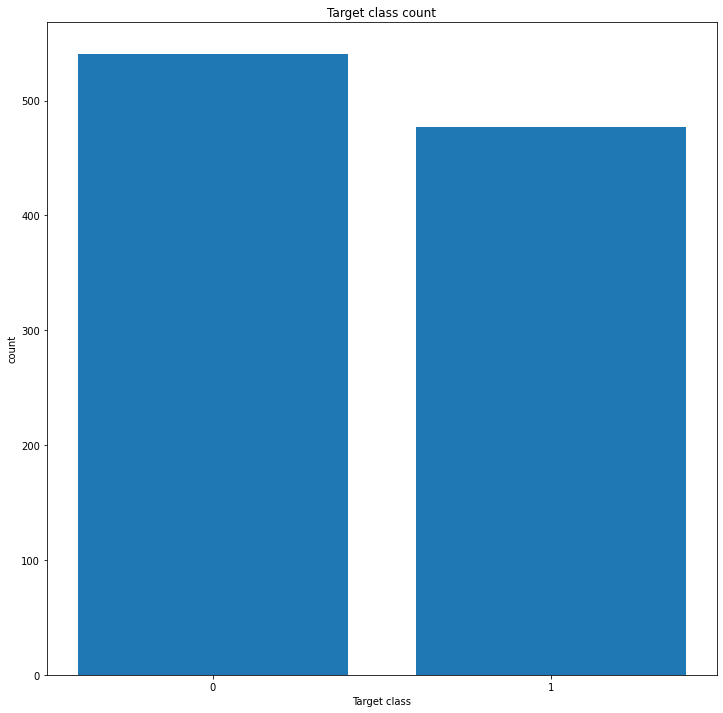

In [ ]:
# visualising the target variable
rcParams['figure.figsize']= 12,12
plt.bar(df['target'].unique(), df['target'].value_counts())
plt.xlabel('Target class')
plt.ylabel('count')
plt.title('Target class count')
plt.xticks([0,1])
plt.show()

###Scaling the data

notes: standardization reduces effects of outlier.

In [ ]:
print(df.columns)

Index(['Unnamed: 0', 'age', 'sex', 'chest_pain_type', 'resting_bp_s',
       'cholesterol', 'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate',
       'exercise_angina', 'oldpeak', 'ST_slope', 'target'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import StandardScaler #library for standardscaler

In [ ]:
#encode the categorical coloumns into dummy and scale remainder coloumns
df = pd.get_dummies(df,columns=['sex', 'chest_pain_type', 'fasting_blood_sugar', 'resting_ecg', 'exercise_angina', 'ST_slope', 'max_heart_rate'])
scaler = StandardScaler()
scaled_coloumns = ['age', 'resting_bp_s', 'cholesterol', 'oldpeak']
df[scaled_coloumns] = scaler.fit_transform(df[scaled_coloumns])

In [ ]:
df.head()

Unnamed: 0       age  resting_bp_s  cholesterol   oldpeak  target  sex_0  \
0           1 -1.412704      0.425872     0.753163 -0.859178       0      0   
1           2 -0.456357      1.572492    -1.151883  0.055625       1      1   
2           3 -1.731486     -0.147439     0.648298 -0.859178       0      0   
3           4 -0.562618      0.311210    -0.557648  0.513026       1      1   
4           5  0.074946      0.999182    -0.889721 -0.859178       0      0   

   sex_1  chest_pain_type_1  chest_pain_type_2  ...  max_heart_rate_184  \
0      1                  0                  1  ...                   0   
1      0                  0                  0  ...                   0   
2      1                  0                  1  ...                   0   
3      0                  0                  0  ...                   0   
4      1                  0                  0  ...                   0   

   max_heart_rate_185  max_heart_rate_186  max_heart_rate_187  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   max_heart_rate_188  max_heart_rate_190  max_heart_rate_192  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   max_heart_rate_194  max_heart_rate_195  max_heart_rate_202  
0                   0                   0                   0  
1                   0                   0                   0  
2                   0                   0                   0  
3                   0                   0                   0  
4                   0                   0                   0  

[5 rows x 132 columns]

###DEEP LEARNING Nueral Network Classification
INPUT LAYER SHAPE- same as number of features, e.g. 5 for age, sex, height, weight, and smoking status for heart disease prediction.

hidden layer- problem specific

neuron per hidden layer - problem specific generally 10 to 100

output layer shape - 1 for binary classification (my problem)

hidden activation  - usually ReLU

output activiation - sigmoid for our binary classification

loss function - Cross entorpy specifically tf.keras.losses.CategoricalCrossentropy

Optimiser - SGD or Adam- can test both to see which
one works best


Dropout - '*The effect is that the network becomes less sensitive to the specific weights of neurons. This in turn results in a network that is capable of better generalization and is less likely to overfit the training data.*' use .20 to .25 for optimum drop out rate

ref https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/

In [ ]:
from sklearn.model_selection import train_test_split
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers
from sklearn.metrics import recall_score, accuracy_score, precision_score, confusion_matrix


In [ ]:
#create x and y and split training and testing data
x = df.drop(['Unnamed: 0', 'target'], axis = 1)
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

#changed the test size to 0.3

In [ ]:
x_train, y_train # visualise the training data

(          age  resting_bp_s  cholesterol   oldpeak  sex_0  sex_1  \
 535  0.606250      0.425872    -0.435306 -0.859178      0      1   
 811  0.606250     -1.294059    -0.120711  0.238586      0      1   
 177  0.074946      0.425872    -0.522693  0.513026      0      1   
 788  1.243814     -1.294059     0.036586 -0.310296      0      1   
 381  1.881378      0.655196    -0.435306  0.787467      0      1   
 ..        ...           ...          ...       ...    ...    ...   
 106 -0.562618     -0.720749     0.141451 -0.859178      1      0   
 270 -0.668879     -0.147439    -0.190621  0.970428      1      0   
 860 -0.668879     -1.408722    -0.050801 -0.859178      0      1   
 435 -0.243836     -1.064735     0.211361  0.055625      1      0   
 102 -1.412704      0.999182     2.553344  0.970428      1      0   
 
      chest_pain_type_1  chest_pain_type_2  chest_pain_type_3  \
 535                  0                  1                  0   
 811                  0                 

In [ ]:
# Model creation

tf.random.set_seed(42)

from keras.engine.base_layer import Layer
tf.random.set_seed(42)

model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(13,activation='relu'),
  tf.keras.layers.Dropout(rate=0.2),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# model_1.build(input_shape = (None, x_train.shape[1]))
model_1.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.SGD(lr=0.1),
                metrics = ['accuracy'])

#increasing the batch size reduce the accuracy use 10,25
#increasing the learning rate to 0.1 form 0.01 increased the accuracy of the model to 90 from 85% on smaller dataset heart.csv




In [ ]:
# model_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 13)                1703      
                                                                 
 dropout_4 (Dropout)         (None, 13)                0         
                                                                 
 dense_10 (Dense)            (None, 1)                 14        
                                                                 
Total params: 1,717
Trainable params: 1,717
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model_1.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=100, batch_size=50)

Epoch 1/100
15/15 [==============================] - 1s 28ms/step - loss: 0.6118 - accuracy: 0.7037 - val_loss: 0.5360 - val_accuracy: 0.8039
Epoch 2/100
15/15 [==============================] - 0s 7ms/step - loss: 0.5193 - accuracy: 0.7893 - val_loss: 0.4761 - val_accuracy: 0.8072
Epoch 3/100
15/15 [==============================] - 0s 7ms/step - loss: 0.4555 - accuracy: 0.7963 - val_loss: 0.4423 - val_accuracy: 0.8170
Epoch 4/100
15/15 [==============================] - 0s 8ms/step - loss: 0.4200 - accuracy: 0.8188 - val_loss: 0.4256 - val_accuracy: 0.8203
Epoch 5/100
15/15 [==============================] - 0s 8ms/step - loss: 0.4018 - accuracy: 0.8146 - val_loss: 0.4022 - val_accuracy: 0.8235
Epoch 6/100
15/15 [==============================] - 0s 8ms/step - loss: 0.3822 - accuracy: 0.8315 - val_loss: 0.3965 - val_accuracy: 0.8268
Epoch 7/100
15/15 [==============================] - 0s 6ms/step - loss: 0.3830 - accuracy: 0.8399 - val_loss: 0.3942 - val_accuracy: 0.8268
Epoch 8/100


In [ ]:
y_pred = model_1.predict(x_test)
y_pred = (y_pred > 0.5)


print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

#created a predict variable and used model to predict it on x test values
#set the value to be above 0 to see if heart diesease present or not

[[137  17]
 [ 26 126]]
0.8594771241830066
0.8811188811188811
0.8289473684210527


###model accuracy and graph of model loss

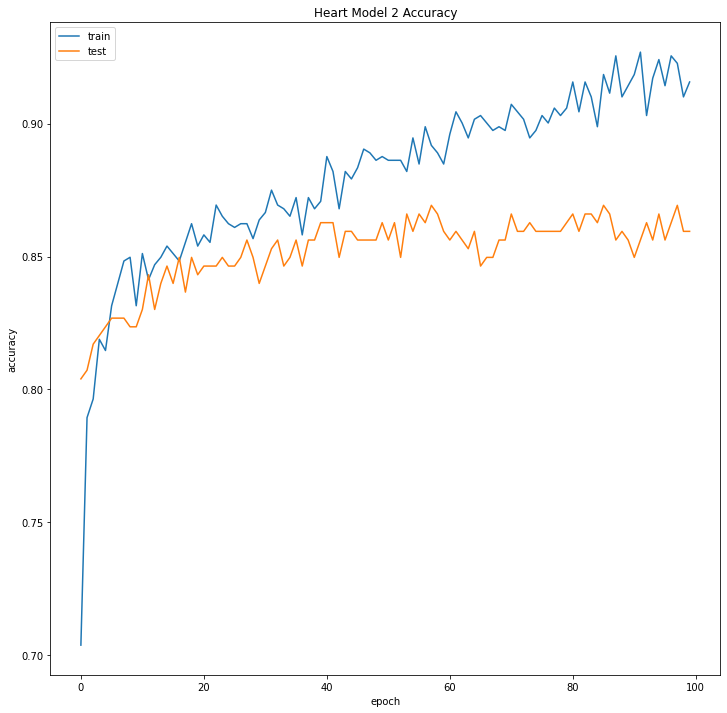

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Heart Model 2 Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()


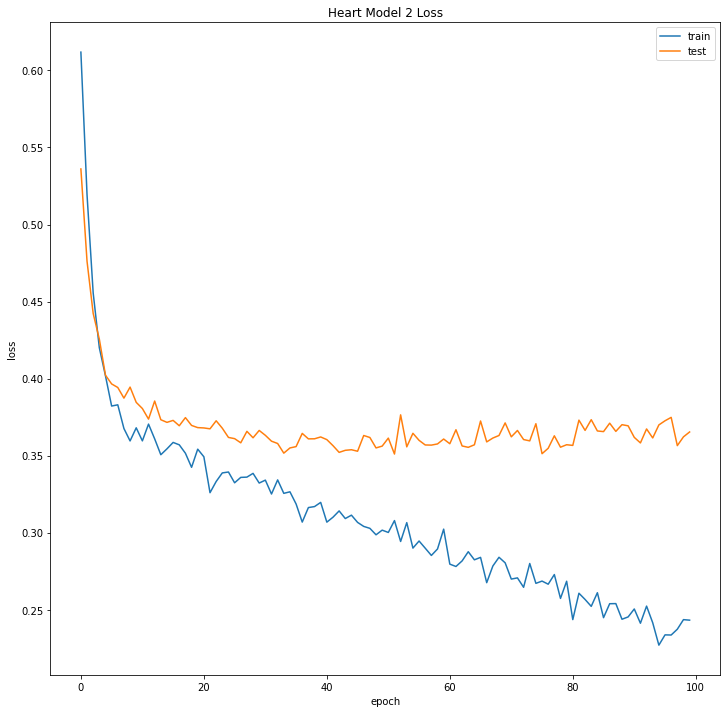

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Heart Model 2 Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()


#IMPROVING THE MODEL

In [ ]:
def improve_model():

    # create model
    # this is a shallow model
    model = Sequential()
    model.add(Dense(13, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.20))
    model.add(Dense(13, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.20))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

    return model

heart_model = improve_model()
#performacne of dl network may not be as good as shallow,

In [ ]:
history_2=heart_model.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=100, batch_size=100)

Epoch 1/100
8/8 [==============================] - 2s 56ms/step - loss: 0.6957 - accuracy: 0.5955 - val_loss: 0.6925 - val_accuracy: 0.7647
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 0.6904 - accuracy: 0.7360 - val_loss: 0.6857 - val_accuracy: 0.7974
Epoch 3/100
8/8 [==============================] - 0s 11ms/step - loss: 0.6828 - accuracy: 0.7598 - val_loss: 0.6762 - val_accuracy: 0.8007
Epoch 4/100
8/8 [==============================] - 0s 12ms/step - loss: 0.6721 - accuracy: 0.7935 - val_loss: 0.6626 - val_accuracy: 0.8137
Epoch 5/100
8/8 [==============================] - 0s 12ms/step - loss: 0.6569 - accuracy: 0.8090 - val_loss: 0.6445 - val_accuracy: 0.8301
Epoch 6/100
8/8 [==============================] - 0s 12ms/step - loss: 0.6383 - accuracy: 0.8090 - val_loss: 0.6211 - val_accuracy: 0.8333
Epoch 7/100
8/8 [==============================] - 0s 10ms/step - loss: 0.6140 - accuracy: 0.8118 - val_loss: 0.5944 - val_accuracy: 0.8235
Epoch 8/100
8/8 [====

In [ ]:
new_y_pred = heart_model.predict(x_test)
new_y_pred = (new_y_pred > 0.5)


print(confusion_matrix(y_test, new_y_pred))
print(accuracy_score(y_test, new_y_pred))
print(precision_score(y_test, new_y_pred))
print(recall_score(y_test, new_y_pred))


[[139  15]
 [ 23 129]]
0.8758169934640523
0.8958333333333334
0.8486842105263158


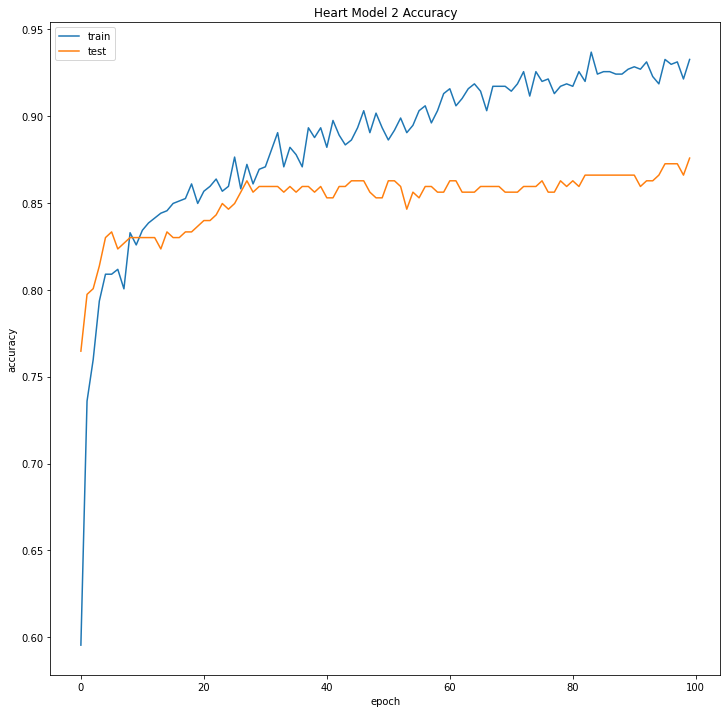

In [ ]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Heart Model 2 Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()


if modedel is underfitting or overfitting
use benchmark dataset to verify effectiveness


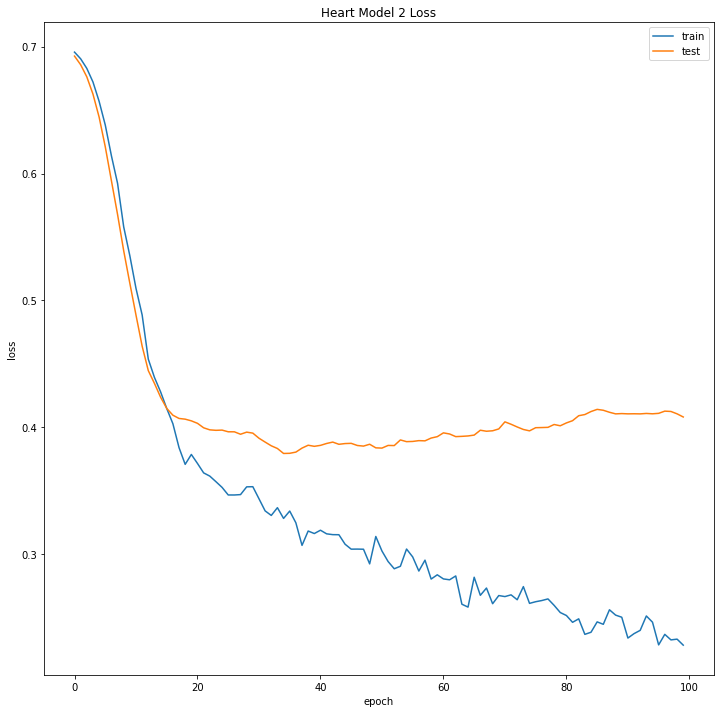

In [ ]:
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Heart Model 2 Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
model_1.evaluate(x_test,y_test) # first model

10/10 [==============================] - 0s 7ms/step - loss: 0.3654 - accuracy: 0.8595


[0.36538296937942505, 0.8594771027565002]

In [ ]:
heart_model.evaluate(x_test,y_test) #improved model

10/10 [==============================] - 0s 2ms/step - loss: 0.4082 - accuracy: 0.8758


[0.40815094113349915, 0.8758170008659363]

#BUILDING A DEEP NUERAL NETWORK

In [ ]:
from keras.utils.vis_utils import plot_model
from IPython.display import Image

In [ ]:

# initialize neural network
clf = Sequential()

# first hidden layer for input data
clf.add(Dense(units=13,
              kernel_initializer='uniform',
              kernel_regularizer=regularizers.l2(0.001),
              activation='relu',
              input_dim=x.shape[1]
              ))

# second hidden layer
clf.add(Dense(units=24,
              kernel_initializer='uniform',
              kernel_regularizer=regularizers.l2(0.001),
              activation='relu'))
clf.add(Dropout(0.20))
# third hidden layer
clf.add(Dense(units=24,
              kernel_initializer='uniform',
              kernel_regularizer=regularizers.l2(0.001),
              activation='relu'))
# the last hidden layer for output
clf.add(Dense(units=1,
              kernel_initializer='uniform',
              activation='sigmoid'))

# compile the network
clf.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy'])


print(clf.summary())





plot_model(clf, to_file='clf.png', show_shapes=True, show_layer_names=True)
# Image('clf.png')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 13)                1703      
                                                                 
 dense_6 (Dense)             (None, 24)                336       
                                                                 
 dropout_3 (Dropout)         (None, 24)                0         
                                                                 
 dense_7 (Dense)             (None, 24)                600       
                                                                 
 dense_8 (Dense)             (None, 1)                 25        
                                                                 
Total params: 2,664
Trainable params: 2,664
Non-trainable params: 0
_________________________________________________________________
None
You must install pydot (`pip install pydot`) an

In [ ]:
# fit model
history = clf.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    batch_size=100,
                    epochs=100,
                    verbose=1)

Epoch 1/100
8/8 [==============================] - 3s 65ms/step - loss: 0.6948 - accuracy: 0.5449 - val_loss: 0.6944 - val_accuracy: 0.5033
Epoch 2/100
8/8 [==============================] - 0s 12ms/step - loss: 0.6937 - accuracy: 0.5435 - val_loss: 0.6938 - val_accuracy: 0.5033
Epoch 3/100
8/8 [==============================] - 0s 13ms/step - loss: 0.6929 - accuracy: 0.5435 - val_loss: 0.6935 - val_accuracy: 0.5033
Epoch 4/100
8/8 [==============================] - 0s 13ms/step - loss: 0.6923 - accuracy: 0.5435 - val_loss: 0.6932 - val_accuracy: 0.5033
Epoch 5/100
8/8 [==============================] - 0s 13ms/step - loss: 0.6916 - accuracy: 0.5435 - val_loss: 0.6927 - val_accuracy: 0.5033
Epoch 6/100
8/8 [==============================] - 0s 14ms/step - loss: 0.6903 - accuracy: 0.5435 - val_loss: 0.6911 - val_accuracy: 0.5033
Epoch 7/100
8/8 [==============================] - 0s 11ms/step - loss: 0.6876 - accuracy: 0.5435 - val_loss: 0.6870 - val_accuracy: 0.5033
Epoch 8/100
8/8 [===

In [ ]:
clf.evaluate(x_test, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 0.4831 - accuracy: 0.8562


[0.48306208848953247, 0.8562091588973999]

In [ ]:
new2_y_pred = clf.predict(x_test)
new2_y_pred = (new2_y_pred > 0.5)


print(confusion_matrix(y_test, new2_y_pred))
print(accuracy_score(y_test, new2_y_pred))
print(precision_score(y_test, new2_y_pred))
print(recall_score(y_test, new2_y_pred))


[[135  19]
 [ 25 127]]
0.8562091503267973
0.8698630136986302
0.8355263157894737


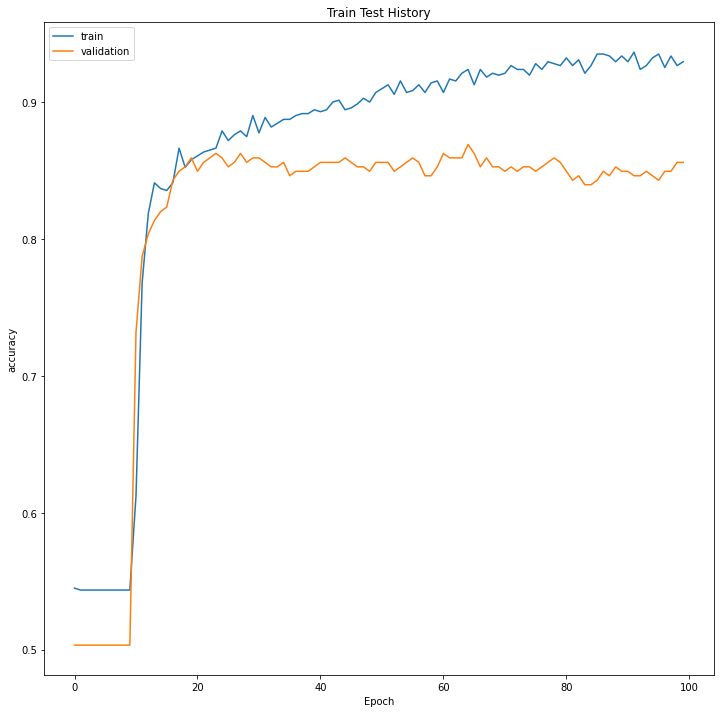

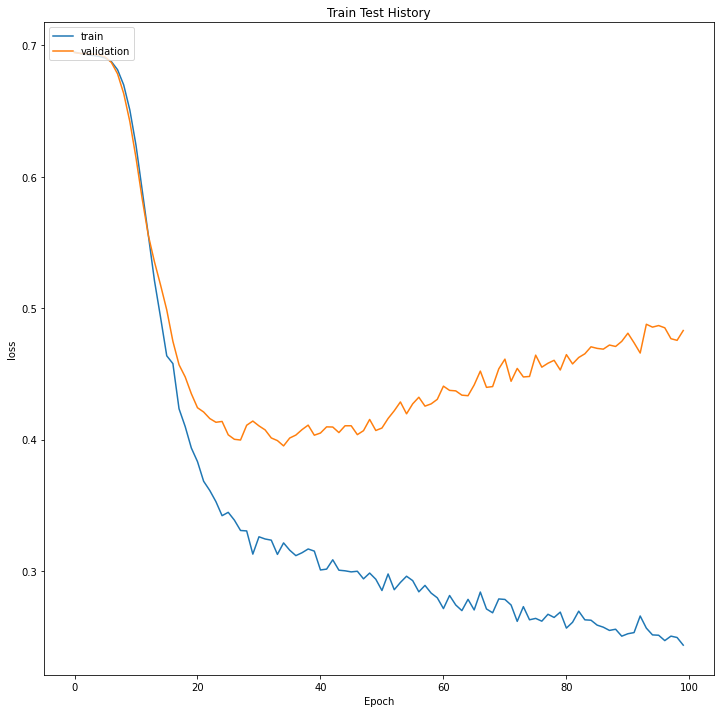

In [ ]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train Test History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

show_train_history(history, 'accuracy', 'val_accuracy')
show_train_history(history, 'loss', 'val_loss')

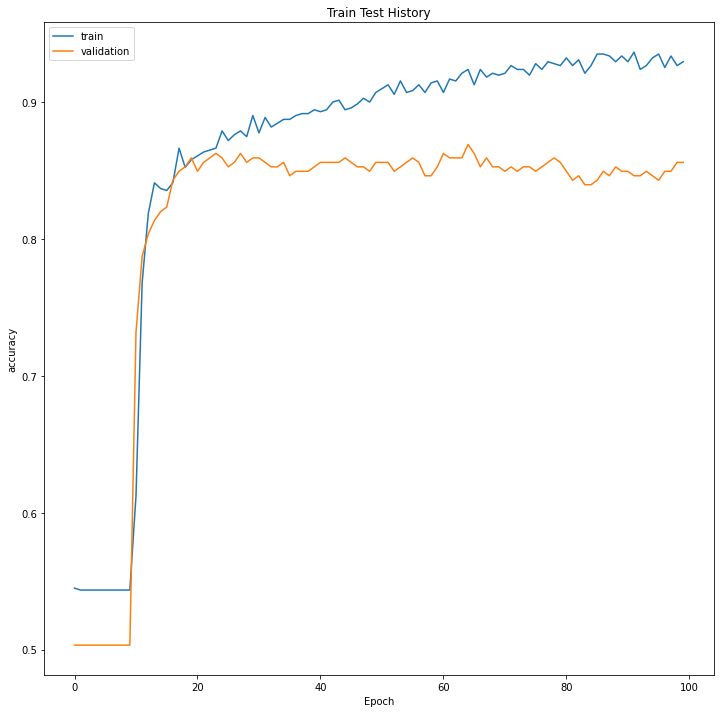

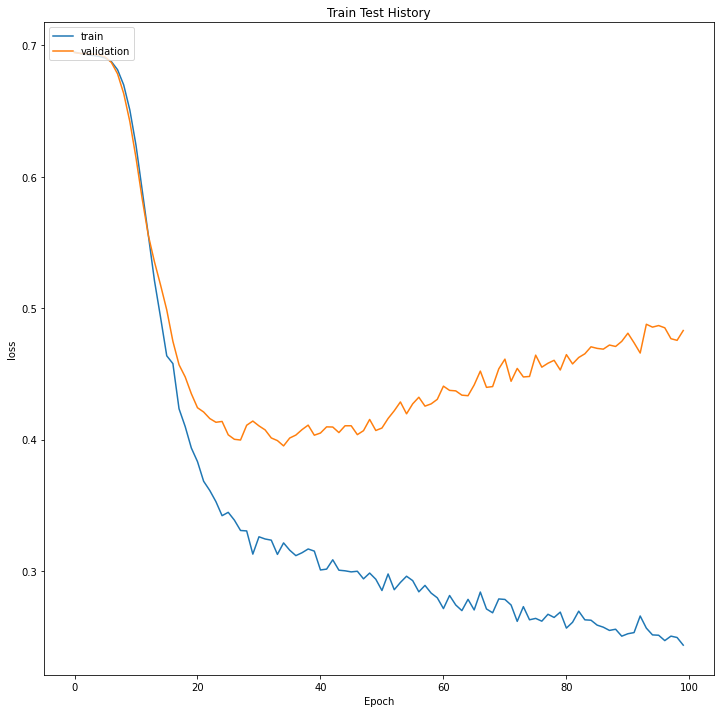

In [ ]:
y_pred = clf.predict(x_test)
y_pred = [1 if i[0] > 0.5 else 0 for i in y_pred]

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  0 154]
 [  0 152]]


In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
score

0.49673202614379086

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.50      0.66       306

    accuracy                           0.50       306
   macro avg       0.50      0.25      0.33       306
weighted avg       1.00      0.50      0.66       306

